In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
F = np.linspace(0, 30, 1000)

# frequency, width and amplitude of revolution harmonics
f = 15
df = 0.7
af = 1

# frequency, width and amplitude of betatron sidebands
fq = 10
dfq = 0.3
afq = 0.5

# frequency, width and amplitude of synchrotron sidebands
fs = 2.5
dfs = 0.1
afs = 0.1

In [3]:
def peak(F, f, d, a):
    return a*np.exp(-(F-f)**2/d)#/d

def noise(F, dz=0*0.1, z=1):
    return z+dz*np.random.random(size=len(F))
    
harmonic = peak(F, f, df, af) * noise(F)
hsync = (peak(F, f-fs, dfs, af*afs) + peak(F, f+fs, dfs, af*afs)) * noise(F)
tune = (peak(F, f-fq, df-dfq, afq*1.1) + peak(F, f+fq, df+dfq, afq*0.9)) * noise(F)
tsync = (peak(F, f-fq-fs, dfs, afq*afs) + peak(F, f-fq+fs, dfs, afq*afs) \
         + peak(F, f+fq-fs, dfs, afq*afs) + peak(F, f+fq+fs, dfs, afq*afs)) * noise(F)

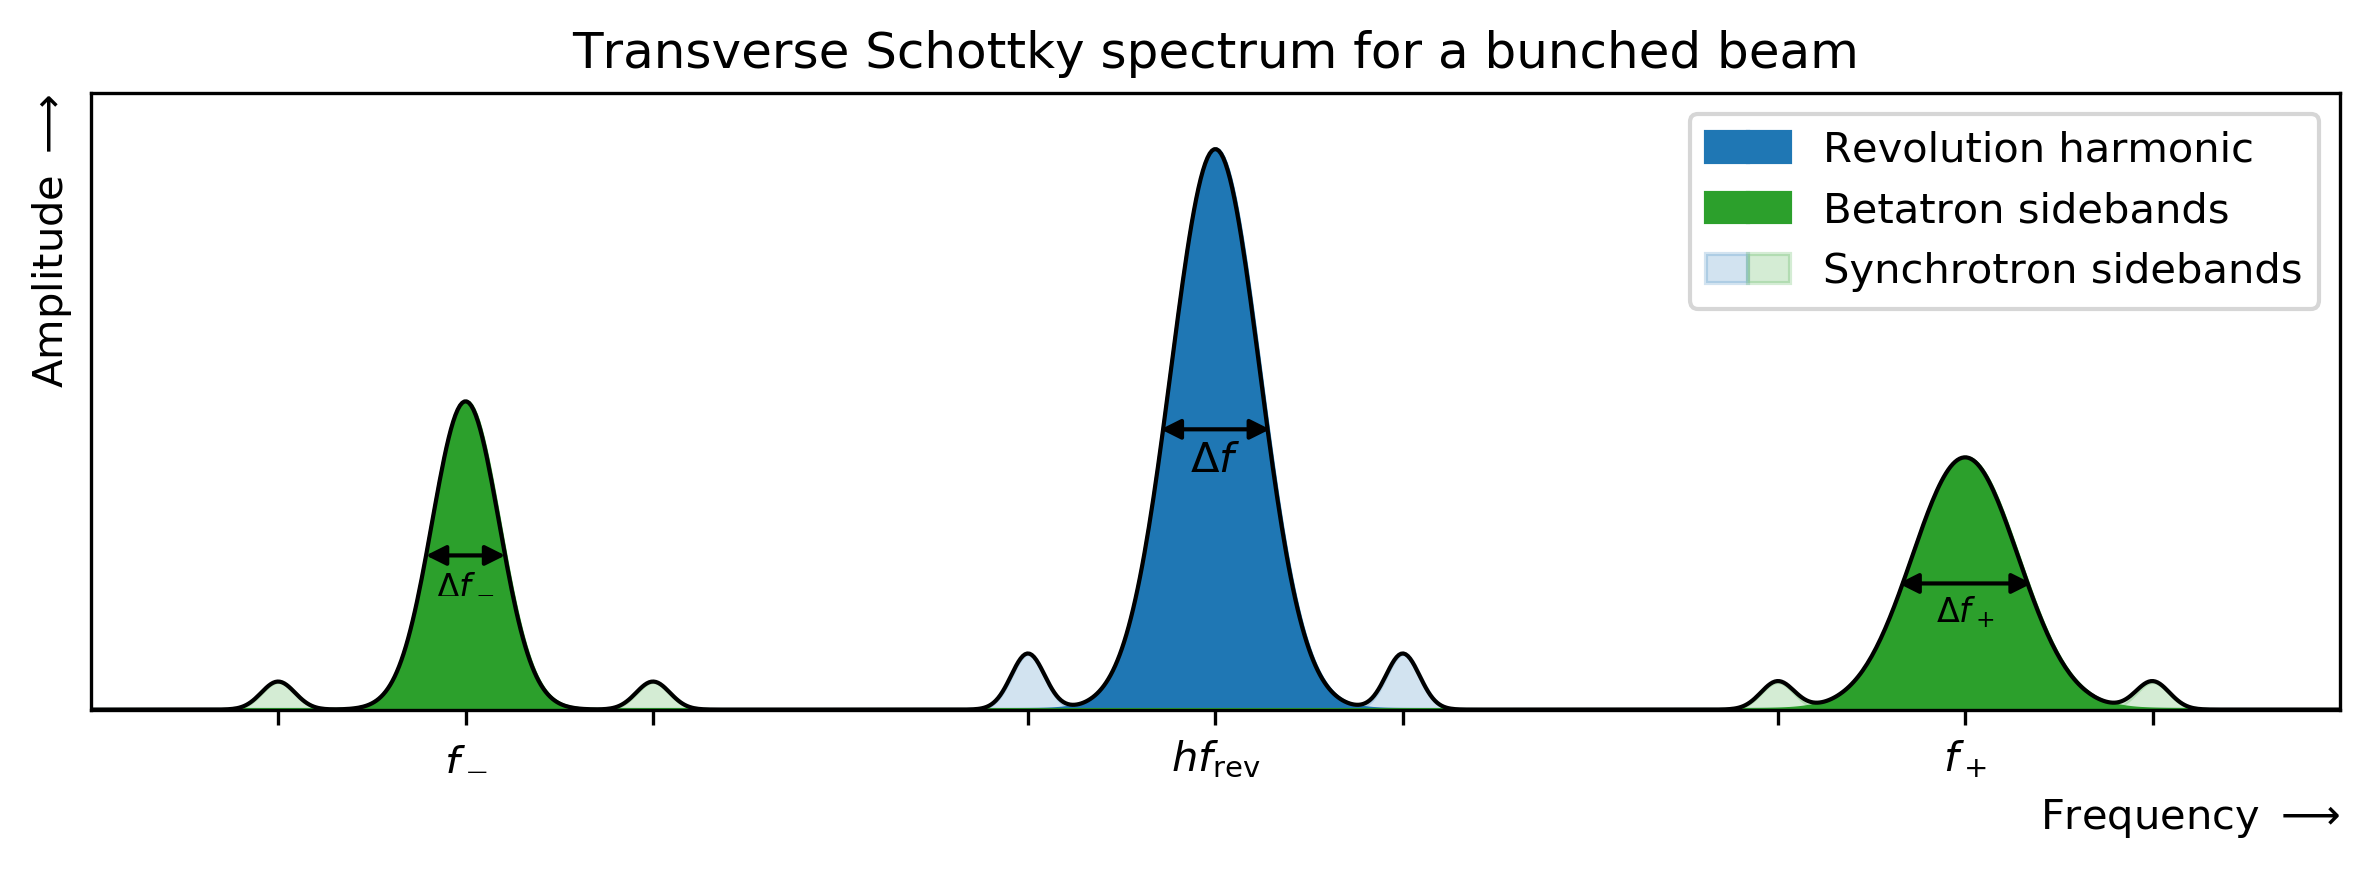

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,3),dpi=300)


ph = ax.fill_between(F, 0, harmonic, color='tab:blue', label='Revolution harmonic')
phs = ax.fill_between(F, 0, hsync, color='tab:blue', alpha=0.2, label='Synchrotron sidebands')
pt = ax.fill_between(F, 0, tune, color='tab:green', label='Betatron sidebands')
pts = ax.fill_between(F, 0, tsync, color='tab:green', alpha=0.2, label='Synchrotron sidebands')

ax.plot(F, harmonic + hsync + tune + tsync, 'k', linewidth=1)

ax.legend((ph, pt, phs, ph, pt, pts), ('','','', 'Revolution harmonic', 'Betatron sidebands', 'Synchrotron sidebands'),
          ncol=2, handletextpad=0.8, handlelength=1.0, columnspacing=-0.8,)
#ax.legend()

ax.set_title('Transverse Schottky spectrum for a bunched beam')

ax.set_xlabel('Frequency $\\longrightarrow$', horizontalalignment='right', x=1)
ax.set_xticks([f-fq-fs, f-fq, f-fq+fs, f-fs, f, f+fs, f+fq-fs, f+fq, f+fq+fs,])
ax.set_xticklabels(['','$f_-$','','','$hf_\mathrm{rev}$','','','$f_+$',''])
ax.set_xlim(np.min(F), np.max(F))

ax.set_ylabel('Amplitude $\\longrightarrow$', horizontalalignment='right', y=1)
ax.set_yticks([])
ax.set_ylim(0, 1.1)

ax.annotate('$\\Delta f$',(f,af/2-0.02),ha='center', va='top');ax.annotate('', (f-1.2*df, af/2), (f+1.2*df, af/2), arrowprops=dict(color='k', arrowstyle='<|-|>'))
ax.annotate('$\\Delta f_-$',(f-fq,afq*1.1/2-0.02),ha='center', va='top',fontsize=8);ax.annotate('', (f-fq-1.6*(df-dfq), afq*1.1/2), (f-fq+1.6*(df-dfq), afq*1.1/2), arrowprops=dict(color='k', arrowstyle='<|-|>'))
ax.annotate('$\\Delta f_+$',(f+fq,afq*0.9/2-0.02),ha='center', va='top',fontsize=8);ax.annotate('', (f+fq-1*(df+dfq), afq*0.9/2), (f+fq+1*(df+dfq), afq*0.9/2), arrowprops=dict(color='k', arrowstyle='<|-|>'))

#ax.annotate('$f_s$',(f-fs/2-0.5,af*afs/2+0.07),ha='center', va='bottom');ax.annotate('', (f-fs-0.2, af*afs*1.1), (f+0.2, af*afs*1.1), arrowprops=dict(color='k', arrowstyle='<|-|>'))
#ax.annotate('$f_s$',(f+fs/2+0.5,af*afs/2+0.07),ha='center', va='bottom');ax.annotate('', (f-0.2, af*afs*1.1), (f+fs+0.2, af*afs*1.1), arrowprops=dict(color='k', arrowstyle='<|-|>'))

fig.tight_layout()
#fig.savefig('schottky.png')
fig.savefig('schottky.pdf')